In [ ]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "careamics[examples]>=0.0.15",
# ]
# ///


The Flywing dataset is composed of a single 3D fluorescence microscopy stack. Here, we 
demonstrate the performances of Noise2Void on this particular dataset!

In [1]:
# Imports necessary to execute the code
from pathlib import Path

import torch
import matplotlib.pyplot as plt
import numpy as np
import tifffile
from careamics import CAREamist
from careamics.config import create_n2v_configuration
from careamics.utils import autocorrelation
from careamics_portfolio import PortfolioManager
from PIL import Image

In [3]:
use_gpu  = "yes" if len([torch.cuda.get_device_properties(i) for i in range(torch.cuda.device_count())]) > 0 else "no"
print(f"Using GPU: {use_gpu}")

Using GPU: yes


## Import the dataset

The dataset can be directly downloaded using the `careamics-portfolio` package, which
uses `pooch` to download the data.

In [4]:
# instantiate data portfolio manage
portfolio = PortfolioManager()

# and download the data
root_path = Path("./data")
file = portfolio.denoising.Flywing.download(root_path)

## Visualize data

Image shape: (35, 520, 692)


Text(0.5, 1.0, 'Slice 30')

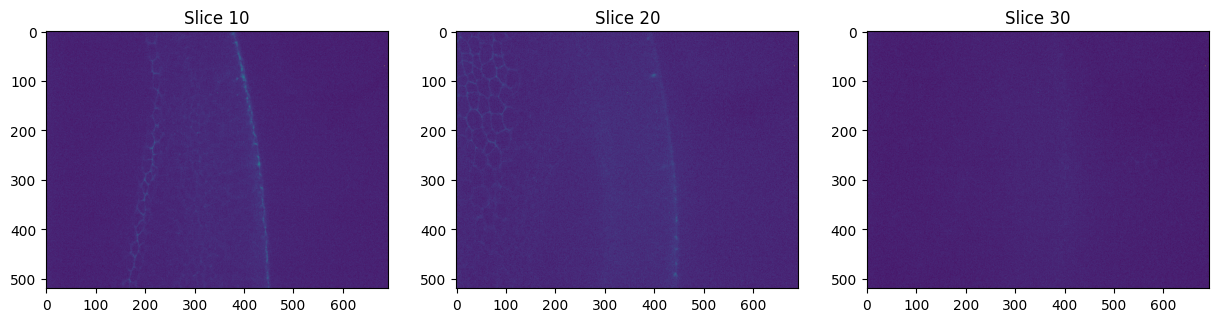

In [8]:
# load stack
train_image = tifffile.imread(file[0])
print(f"Image shape: {train_image.shape}")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(train_image[10])
ax[0].set_title("Slice 10")
ax[1].imshow(train_image[20])
ax[1].set_title("Slice 20")
ax[2].imshow(train_image[30])
ax[2].set_title("Slice 30")

### Compute autocorrelation

Text(0.5, 1.0, 'Autocorrelation')

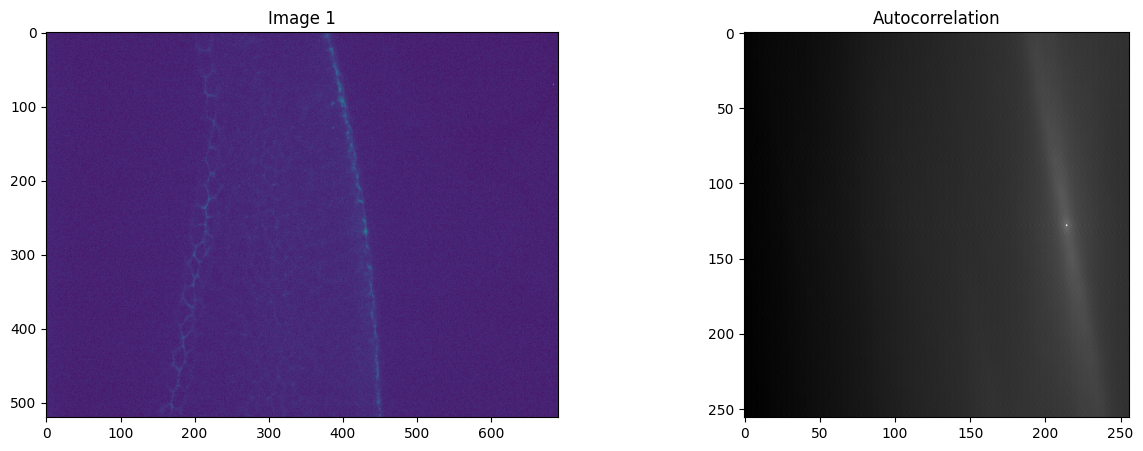

In [9]:
slice_idx = 10
autocorr = autocorrelation(train_image[slice_idx])

# crop the correlation around (0, 0)
midpoint = train_image[slice_idx].shape[0] // 2
crop_size = 128
slices = (
    slice(midpoint - crop_size, midpoint + crop_size),
    slice(midpoint - crop_size, midpoint + crop_size),
)
# plot autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(train_image[slice_idx])
ax[0].set_title("Image 1")
ax[1].imshow(autocorr[slices], cmap="gray")
ax[1].set_title("Autocorrelation")

## Train with CAREamics

The easiest way to use CAREamics is to create a configuration and a `CAREamist`. 

### Create configuration

The configuration can be built from scratch, giving the user full control over the various
parameters available in CAREamics. However, a straightforward way to create a configuration
for a particular algorithm is to use one of the convenience functions.

In [11]:
config = create_n2v_configuration(
    experiment_name="flywing_n2v",
    data_type="array",
    axes="ZYX",
    patch_size=(16, 64, 64),
    batch_size=2,
    num_epochs=50,
    augmentations=[],  # remove augmentations
)

print(config)

{'algorithm_config': {'algorithm': 'n2v',
                      'loss': 'n2v',
                      'lr_scheduler': {'name': 'ReduceLROnPlateau',
                                       'parameters': {}},
                      'model': {'architecture': 'UNet',
                                'conv_dims': 3,
                                'depth': 2,
                                'final_activation': 'None',
                                'in_channels': 1,
                                'independent_channels': True,
                                'n2v2': False,
                                'num_channels_init': 32,
                                'num_classes': 1,
                                'use_batch_norm': True},
                      'n2v_config': {'masked_pixel_percentage': 0.2,
                                     'name': 'N2VManipulate',
                                     'remove_center': True,
                                     'roi_size': 11,
                    

### Train

A `CAREamist` can be created using a configuration alone, and then be trained by using
the data already loaded in memory.

In [12]:
# instantiate a CAREamist
careamist = CAREamist(source=config)

# train
careamist.train(
    train_source=train_image,
    val_percentage=0.0,
    val_minimum_split=10,  # use 10 patches as validation
)

No working directory provided. Using current working directory: /localscratch/careamics-examples/applications/n2v/3D.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A40-16Q') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Computed dataset mean: [36.833492], std: [5.2682185]
/home/joran.deschamps/.cache/uv/environments-v2/juv-tmp-uh30i538-2257cb0db5647dfd/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:751: Checkpoint directory /localscratch/careamics-examples/applications/n2v/3D/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params | Mode 
------

Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


{'epoch': [], 'learning_rate': [], 'step': [], 'train_loss_epoch': [], 'train_loss_step': [], 'val_loss': []}


Text(0.5, 1.0, 'Losses')

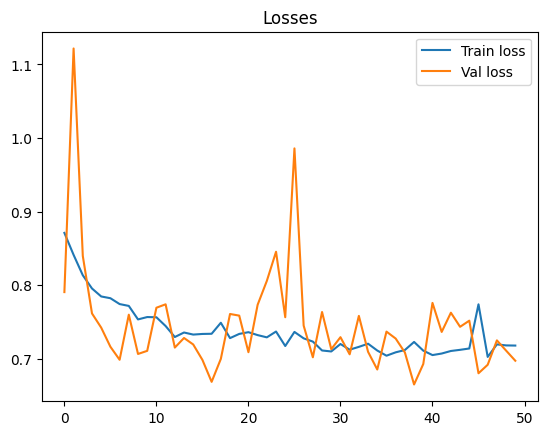

In [13]:
loss_dict = careamist.get_losses()
plt.plot(loss_dict["train_epoch"], loss_dict["train_loss"], loss_dict["val_epoch"], loss_dict["val_loss"])
plt.legend(["Train loss", "Val loss"])
plt.title("Losses")

## Predict with CAREamics

Prediction is done with the same `CAREamist` used for training. Because the image is large
we predict using tiling.

In [14]:
prediction = careamist.predict(
    source=train_image,
    tile_size=(32, 128, 128),
    tile_overlap=(8, 48, 48),
    batch_size=1,
    tta=False,
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/joran.deschamps/.cache/uv/environments-v2/juv-tmp-uh30i538-2257cb0db5647dfd/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Predicting: |                                             | 0/? [00:00<?, ?it/s]

### Save predictions

In [15]:
pred_folder = Path("results_n2v")
pred_folder.mkdir(exist_ok=True, parents=True)

tifffile.imwrite(pred_folder / "prediction.tiff", prediction[0])

### Visualize the prediction

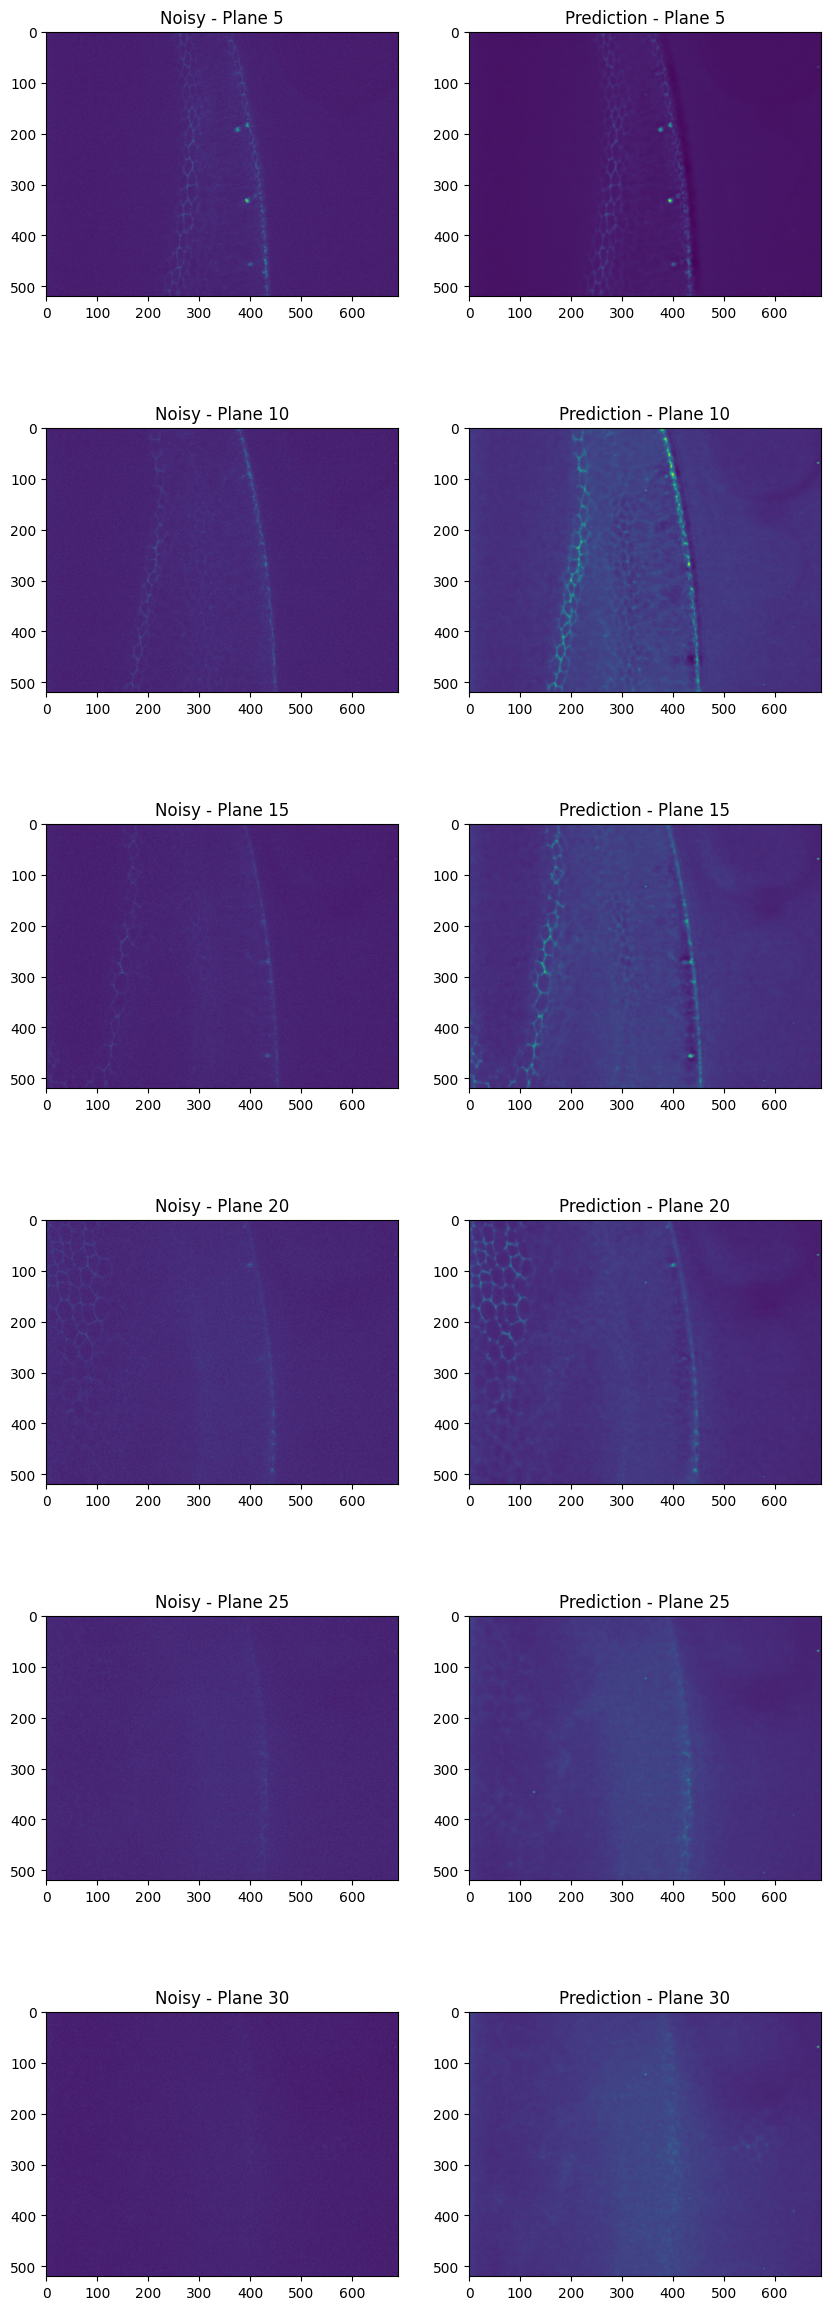

In [16]:
# Show multiple slices
zs = [5, 10, 15, 20, 25, 30]

fig, ax = plt.subplots(len(zs), 2, figsize=(10, 5 * len(zs)))
for i, z in enumerate(zs):
    ax[i, 0].imshow(train_image[z])
    ax[i, 0].set_title(f"Noisy - Plane {z}")

    ax[i, 1].imshow(prediction[0].squeeze()[z])
    ax[i, 1].set_title(f"Prediction - Plane {z}")

## Create cover

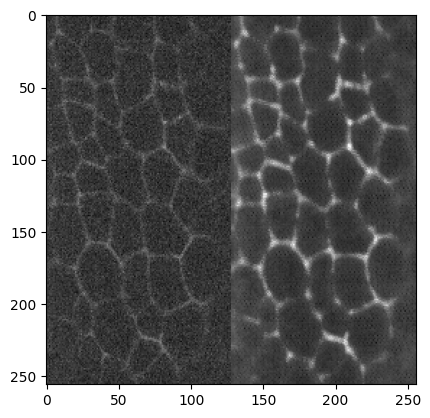

In [17]:
# create a cover image
im_idx = 20
x_min = 0
y_min = 0
size = 256

cv_image_noisy = train_image[im_idx]
cv_image_pred = prediction[0].squeeze()[im_idx]

# create image
cover = np.zeros((size, size))
(height, width) = cv_image_noisy.shape
assert height > size
assert width > size
assert y_min + size < height
assert x_min + size < width

# normalize train and prediction
norm_noise = (cv_image_noisy - cv_image_noisy.min()) / (
    cv_image_noisy.max() - cv_image_noisy.min()
)
norm_pred = (cv_image_pred - cv_image_pred.min()) / (
    cv_image_pred.max() - cv_image_pred.min()
)

# fill in halves
cover[:, : size // 2] = norm_noise[y_min : y_min + size, x_min : x_min + size // 2]
cover[:, size // 2 :] = norm_pred[y_min : y_min + size, x_min : x_min + size // 2]

# plot the single image
plt.imshow(cover, cmap="gray")

# save the image (saturate for rendering)
im = Image.fromarray(cover * 255)
im = im.convert("L")

im.save("Flywing_N2V.jpeg")